In [11]:
import json
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
#from model import makeModel
import helper
import nlpaug.augmenter.word as naw
import torch
import matplotlib.pyplot as plt

In [36]:
import tensorflow as tf

def makeModel(vocab_size, embedding_dim, max_length):
    tf.keras.backend.clear_session()

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
       
        tf.keras.layers.Dropout(0.5),
        
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                                                                # 0.001,
                                                                # decay_steps=100000,
                                                                # decay_rate=0.98,
                                                                # staircase=True)

    model.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(2e-4), metrics=["accuracy"])
    # learning_rate=1.1220e-04
    return model

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [47]:
with open("./data/training_data.json", 'r') as f:
    datastore = json.load(f)

headlines = []
labels = []

for item in datastore:
    headlines.append(item['title'])
    labels.append(item['good_news'])

new_labels = []

for label in labels:
    new_labels.append(label)
    new_labels.append(label)

print(len(new_labels), len(labels))

#print(training_labels)

#limiting character length and vocab size
vocab_size = 10000
max_length = 25
embedding_dim = 10
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# training tokenizer
tokenizer.fit_on_texts(headlines)
word_index = tokenizer.word_index



TOPK=100 #default=100
ACT = 'substitute' #"substitute"
headlines_aug=[] 

with open(r'data/augmented_training_data.txt', 'w', encoding="utf-8") as fp:

    for i in range(len(headlines)):
        aug = naw.ContextualWordEmbsAug(
            model_path='bert-base-uncased', action="insert")
        fp.write(str(aug.augment(headlines[i])) + "\n")
        fp.write(str(headlines[i] + "\n"))
        print(str(i) + " out of " + str(len(headlines)))

print("------------------------------------------------------------------------------")


with open('data/augmented_training_data.txt', 'r', encoding='UTF-8') as file:
    for line in file:
        headlines_aug.append(line)
    
file.close()

#print(f"Added data length: {len(training_headlines_aug)}, previous data length: {len(training_headlines)}")

# split the data 80/20
training_headlines, testing_headlines, training_labels, testing_labels = train_test_split(headlines_aug, new_labels, train_size=0.8, test_size=0.2)

# adding padding 
training_sequences = tokenizer.texts_to_sequences(training_headlines)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_headlines)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)



3782 1891
0 out of 1891
1 out of 1891
2 out of 1891
3 out of 1891
4 out of 1891
5 out of 1891
6 out of 1891
7 out of 1891
8 out of 1891
9 out of 1891
10 out of 1891
11 out of 1891
12 out of 1891
13 out of 1891
14 out of 1891
15 out of 1891
16 out of 1891
17 out of 1891
18 out of 1891
19 out of 1891
20 out of 1891
21 out of 1891
22 out of 1891
23 out of 1891
24 out of 1891
25 out of 1891
26 out of 1891
27 out of 1891
28 out of 1891
29 out of 1891
30 out of 1891
31 out of 1891
32 out of 1891
33 out of 1891
34 out of 1891
35 out of 1891
36 out of 1891
37 out of 1891
38 out of 1891
39 out of 1891
40 out of 1891
41 out of 1891
42 out of 1891
43 out of 1891
44 out of 1891
45 out of 1891
46 out of 1891
47 out of 1891
48 out of 1891
49 out of 1891
50 out of 1891
51 out of 1891
52 out of 1891
53 out of 1891
54 out of 1891
55 out of 1891
56 out of 1891
57 out of 1891
58 out of 1891
59 out of 1891
60 out of 1891
61 out of 1891
62 out of 1891
63 out of 1891
64 out of 1891
65 out of 1891
66 out of 

In [51]:
import os

checkpoint_path = "checkpoints/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_best_only=True,
                                                 monitor='val_accuracy')

In [54]:
tf.keras.backend.clear_session()
model = makeModel(vocab_size, 10, max_length)
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
history = model.fit(training_padded, training_labels, batch_size=128, epochs=60, validation_data=(testing_padded, testing_labels), callbacks=[cp_callback])

Epoch 1/60
24/24 [==============================] - 4s 34ms/step - loss: 0.6931 - accuracy: 0.4982 - val_loss: 0.6925 - val_accuracy: 0.5429
Epoch 2/60
24/24 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5544 - val_loss: 0.6918 - val_accuracy: 0.5429
Epoch 3/60
24/24 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.5550 - val_loss: 0.6910 - val_accuracy: 0.5429
Epoch 4/60
24/24 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.5557 - val_loss: 0.6903 - val_accuracy: 0.5429
Epoch 5/60
24/24 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.5550 - val_loss: 0.6899 - val_accuracy: 0.5429
Epoch 6/60
24/24 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.5550 - val_loss: 0.6895 - val_accuracy: 0.5429
Epoch 7/60
24/24 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.5550 - val_loss: 0.6893 - val_accuracy: 0.5429
Epoch 8/60
24/24 [=

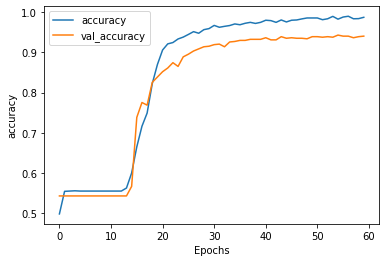

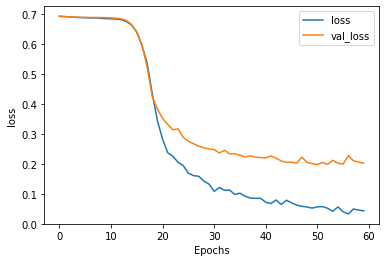

In [55]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")